This file allows generation of datasets for multilayer thin films

In [1]:
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
import numpy as np
# import de2 as de
import multiprocessing as mp
# import makeqx as mkq
import oldqx as oqx
from matplotlib import rc

# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

def rndtop5(x):
    return np.round(x*2.0)/2


def cmt_wrapper2(arg):
    args, kwargs = arg
    return oqx.copmodtheory(*args, **kwargs)

def cmt_par(pop, **kwargs):
    jobs = []
    pool=mp.Pool(100)
    for indiv in pop:
        #indiv = indiv.reshape((int(indiv.size/2), 2))
        #indiv[:,1] = mkq.digitize_qx(indiv[:,1], dlevels=2)
        #indiv = rndtop5(indiv)
        #indiv = indiv.flatten()
        jobs.append((indiv, 0))
    arg = [(j, kwargs) for j in jobs]
    answ = np.array(pool.map(cmt_wrapper2, arg))
    pool.close()
    return answ



def tmm_wrapper2(arg):
    args, kwargs = arg
    return oqx.tmm_eval_wsweep(*args, **kwargs)

def arc_par(pop, **kwargs):
    jobs = []
    pool=mp.Pool(100)
    for indiv in pop:
        #indiv = indiv.reshape((int(indiv.size/2), 2))
        #indiv[:,1] = mkq.digitize_qx(indiv[:,1], dlevels=2)
        #indiv = rndtop5(indiv)
        #indiv = indiv.flatten()
        jobs.append((indiv, 0))
    arg = [(j, kwargs) for j in jobs]
    answ = np.array(pool.map(tmm_wrapper2, arg))
    pool.close()
    return answ


In [10]:
dataset_size = 10000

# parameters of the dataset
num_layers = 16
num_lpoints = 64

lam_min = 400
lam_max = 800

#lams = np.linspace(lam_min, lam_max, endpoint=True, num=num_lpoints)
lam_inv = np.linspace(1/lam_min, 1/lam_max, num=num_lpoints, endpoint=True)
lams = 1.0/lam_inv


#lams = np.linspace(lam_low, lam_high, endpoint=True, num=lam_pts)
#lam_inv = np.linspace(1/400.0, 1/800.0, num=num_lpoints, endpoint=True)
#lams = 1.0/lam_inv
dataset_X = np.random.uniform(10, 100, num_layers*dataset_size).astype(float).reshape(dataset_size, num_layers)
#dataset_X

import diversipy.hycusampling as hycu


strat = hycu.stratify_generalized(dimension=num_layers, num_strata=dataset_size)
dataset_X2 = hycu.stratified_sampling(strat)


border = 0.4  # 10 percent points on border
scaler = 0.5*((1.0/(1.0 - border) )**(1/num_layers) - 1)  # 10 percent border points
lower_c = np.zeros(num_layers)
upper_c = np.ones(num_layers)


dataset_X2 =  100.0*np.clip( hycu.scaled(dataset_X2,   
                                  from_cuboid=( lower_c, upper_c ), 
                                  to_cuboid= ( lower_c - scaler,  upper_c + scaler)),  
                                  0.1, 1)

dataset_X2 = np.round(dataset_X2*2.0)/2
print(scaler)

# for idx in range(dataset_size):
#     tmp = np.random.uniform( 0, 1, num_layers)
# #     print(tmp)
# #     print(np.sum(tmp))
# #     print( tmp/np.sum(tmp)   )
#     dataset_X[idx] = tmp/np.sum(tmp)
    
# #lams = np.linspace(lam_min, lam_max, num_lpoints, endpoint=True)
#dataset_Y = np.zeros((dataset_size,num_lpoints))
# dataset_Y2 = np.zeros((dataset_size,num_lpoints))

#dataset_Y = arc_par( dataset_X,  lam_low=lam_min, lam_high=lam_max, lam_pts = num_lpoints)
dataset_Y2 = arc_par( dataset_X2,  lam_low=lam_min, lam_high=lam_max, lam_pts = num_lpoints)
#dataset_Z2 = cmt_par( dataset_X2,  lam_low=lam_min, lam_high=lam_max, lam_pts = num_lpoints)


0.016220861417549304


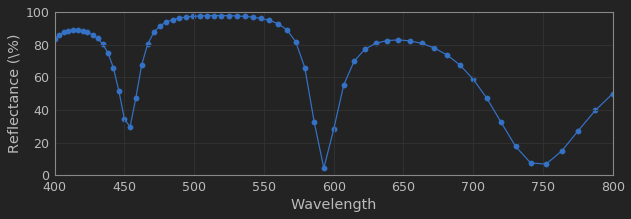

In [28]:
# check the generated dataset here
%reload_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style(grid=True)


# currently installed theme will be used to
# set plot style if no arguments provided
#jtplot.style(theme='grade3', grid=False)

#plt.plot(dataset_Y[  0  ])
fig = plt.figure(figsize=(10,3))

#indexx = np.random.randint(0, 10)
indexx = 19
# plt.subplot(1,2,1)
# plt.scatter(lam_inv, dataset_Y[ indexx  ])
# plt.plot(lam_inv, dataset_Y[ indexx  ])
# plt.ylim([0, 100])
# plt.xlim([1/lam_max, 1/lam_min])
# plt.xlabel(r'Normalized inverse wavelength ($a/ \lambda$)')
# plt.ylabel('Reflectance (\%)')


plt.subplot(1,1,1)
plt.plot(lams, 100*dataset_Y2[ indexx ])
plt.scatter(lams, 100*dataset_Y2[ indexx ])

#plt.xlim([0.25,0.5])
plt.ylim([0, 100])
plt.xlim([400, 800])
plt.xlabel(r'Wavelength')
plt.ylabel('Reflectance (\%)')
plt.show()
#plt.tight_layout()
# fig.savefig("dnns.pdf", bbox_inches='tight')
# 10 + dataset_X2*90

In [11]:
#save the dataset to a hdf file

import h5py
h5f = h5py.File('D10k.h5', 'w')
h5f.create_dataset('sizes', data=dataset_X2)
h5f.create_dataset('spectrum', data=dataset_Y2)
#h5f.create_dataset('physics', data=dataset_Z2)
h5f.close()







In [31]:
a = dataset_X2[indexx]
#a = np.array([80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80]           )
#a = a + 20

9566
0.0635366023403834
2.8754768571545952


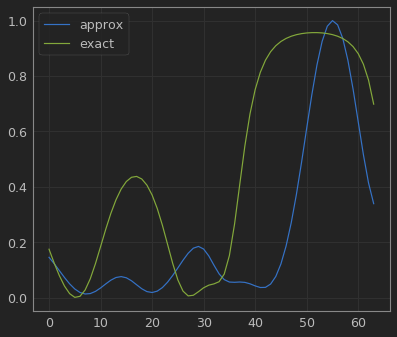

In [275]:
def mse(x, y):
    return np.linalg.norm(x - y)


indexx = np.random.randint(0, 10000)
print(indexx)
plt.plot(dataset_Z2[indexx], label='approx')
plt.plot(dataset_Y2[indexx], label='exact')
plt.legend()
print(ssim(dataset_Z2[indexx], dataset_Y2[indexx], data_range=1))
print(mse(dataset_Z2[indexx], dataset_Y2[indexx]))


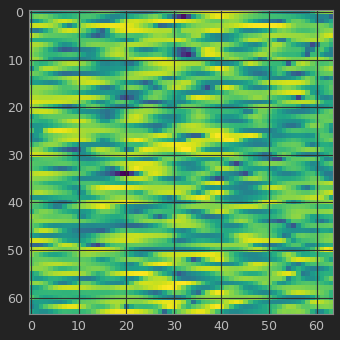

In [252]:
plt.imshow(dataset_Y2[:64] - dataset_Z2[:64])

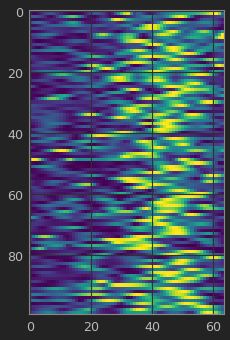

In [233]:
plt.imshow(dataset_Z2[:100])

In [ ]:
lams, R = oqx.copmodtheory(a, 0)
plt.plot(lams, R)
plt.plot(lams, dataset_Y2[indexx])
# plt.ylim([0,1])

In [ ]:
eps_om = np.fft.fft(epsx)/L
plt.plot(freqs, np.abs(eps_om))
#plt.plot(freqs, np.imag(eps_om))
plt.xlim([0,0.015])
plt.ylim([0,1])

In [ ]:
freqs[:20]

In [ ]:
plt.plot(a, epsx)

In [ ]:
epsx.shape

In [ ]:

plt.plot(tt)
#plt.plot(tt.imag)
# #plt.plot(tt2)
#plt.ylim([0,1])

In [ ]:
Lm = (tt.shape[0])
fg = (np.fft.fft(tt)/Lm)**2

In [ ]:
plt.plot(fg[:25])

In [ ]:
np.exp(-1j*2.0*(2.0*np.pi/600)*612)

In [ ]:
np.exp(-1j*2)

In [ ]:
(0.3 - 1j*0.2)**2

In [ ]:
40000/400

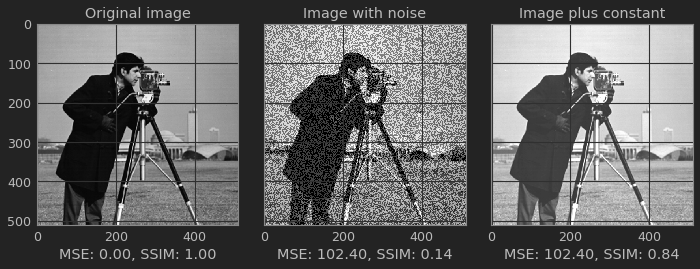

In [200]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim

img = img_as_float(data.camera())
rows, cols = img.shape

noise = np.ones_like(img) * 0.2 * (img.max() - img.min())
noise[np.random.random(size=noise.shape) > 0.5] *= -1

def mse(x, y):
    return np.linalg.norm(x - y)

img_noise = img + noise
img_const = img + abs(noise)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4),
                         sharex=True, sharey=True)
ax = axes.ravel()

mse_none = mse(img, img)
ssim_none = ssim(img, img, data_range=img.max() - img.min())

mse_noise = mse(img, img_noise)
ssim_noise = ssim(img, img_noise,
                  data_range=img_noise.max() - img_noise.min())

mse_const = mse(img, img_const)
ssim_const = ssim(img, img_const,
                  data_range=img_const.max() - img_const.min())

label = 'MSE: {:.2f}, SSIM: {:.2f}'

ax[0].imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[0].set_xlabel(label.format(mse_none, ssim_none))
ax[0].set_title('Original image')

ax[1].imshow(img_noise, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[1].set_xlabel(label.format(mse_noise, ssim_noise))
ax[1].set_title('Image with noise')

ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
ax[2].set_xlabel(label.format(mse_const, ssim_const))
ax[2].set_title('Image plus constant')

plt.tight_layout()
plt.show()


In [197]:
from skimage.measure import _structural_similarity as ssim 

In [202]:
ssim(dataset_Z2[272], dataset_Y2[272], data_range=1)


0.4347255326818758